In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import pathlib
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
df = pathlib.Path("data/anime_images")

batch_size = 10
img_height = 128
img_width = 128


train_ds = train_ds = tf.keras.utils.image_dataset_from_directory(
  df,
  validation_split=0.2,
  subset="training",
  seed=0,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = train_ds = tf.keras.utils.image_dataset_from_directory(
  df,
  validation_split=0.2,
  subset="validation",
  seed=0,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

nb_class = len(class_names)

Found 83066 files belonging to 232 classes.
Using 66453 files for training.


2024-05-20 11:40:02.601308: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-20 11:40:02.639930: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-20 11:40:02.640149: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 83066 files belonging to 232 classes.
Using 16613 files for validation.
['A Lull in the Sea', 'A Place Further Than The Universe', 'A Silent Voice', 'AKIRA', 'Ace of Diamond', 'Akatsuki no Yona', 'Angel Beats!', 'Aria The Natural', 'Aria The Origination', 'Assassination Classroom', 'Attack on Titan', 'Baccano!', 'Bakemonogatari', 'Bakuman', 'Barakamon', 'Beck Mongolian Chop Squad', 'Berserk', 'Big Windup!', 'Black Butler', 'Black Lagoon', 'Bunny Drop', 'Cardcaptor Sakura', 'Carpcaptor Sakura', 'Castle in the Sky', 'Chihayafuru', 'Clannad', 'Code Geass', 'Cross Game', 'D.Gray-man', 'DARLING in the FRANXX', 'Daily Lives of High School Boys', 'Darker than Black', 'Death Note', 'Death Parade', 'Den-noh Coil', 'Descending Stories Showa Genroku Rakugo Shinju', 'Detective Conan', 'Detroit Metal City The Animated Series', 'Dragon Ball', 'Dragon Ball Z', 'Durarara', 'Durarara!!', 'ERASED', 'Erin', 'Eureka Seven', 'FateZero', 'Fatestay night', 'Fighting Spirit Special', 'From the New World

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(128,(3,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(nb_class)
    ])

In [4]:
#model.load_weights('model_weight')

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

In [5]:
model.build((None,img_height,img_width,3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 128)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 508032)            0         
                                                                 
 dense (Dense)               (None, 256)               130056448 
                                                                 
 dense_1 (Dense)             (None, 232)               59624     
                                                        

In [6]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


2024-05-20 11:40:09.262003: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-05-20 11:40:09.616007: I external/local_xla/xla/service/service.cc:168] XLA service 0x7561cb8d7e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-20 11:40:09.616033: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-05-20 11:40:09.623244: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1716198009.710530   25962 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 109/1662 [>.............................] - ETA: 1:04 - loss: 11.6227 - accuracy: 0.0046

2024-05-20 11:40:14.661662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1662/1662 [==============================] - ETA: 0s - loss: 5.8534 - accuracy: 0.0051

2024-05-20 11:41:19.984350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1662/1662 [==============================] - 82s 48ms/step - loss: 5.8534 - accuracy: 0.0051 - val_loss: 5.4370 - val_accuracy: 0.0062
Epoch 2/10
 109/1662 [>.............................] - ETA: 1:04 - loss: 5.4331 - accuracy: 0.0028

2024-05-20 11:41:35.298163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1661/1662 [============================>.] - ETA: 0s - loss: 5.4459 - accuracy: 0.0060

2024-05-20 11:42:40.507672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1662/1662 [==============================] - 80s 48ms/step - loss: 5.4459 - accuracy: 0.0060 - val_loss: 5.4336 - val_accuracy: 0.0062
Epoch 3/10
 109/1662 [>.............................] - ETA: 1:04 - loss: 5.4307 - accuracy: 0.0018

2024-05-20 11:42:55.435181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1661/1662 [============================>.] - ETA: 0s - loss: 5.4545 - accuracy: 0.0062

2024-05-20 11:44:00.870359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1662/1662 [==============================] - 80s 48ms/step - loss: 5.4545 - accuracy: 0.0062 - val_loss: 5.4316 - val_accuracy: 0.0062
Epoch 4/10
 109/1662 [>.............................] - ETA: 1:09 - loss: 5.4229 - accuracy: 0.0028

2024-05-20 11:44:16.218563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1661/1662 [============================>.] - ETA: 0s - loss: 5.4333 - accuracy: 0.0062

2024-05-20 11:45:38.720062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1662/1662 [==============================] - 98s 59ms/step - loss: 5.4333 - accuracy: 0.0062 - val_loss: 5.4307 - val_accuracy: 0.0062
Epoch 5/10
 109/1662 [>.............................] - ETA: 1:05 - loss: 5.4230 - accuracy: 0.0028

2024-05-20 11:45:54.233140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 671/1662 [===========>..................] - ETA: 41s - loss: 5.4314 - accuracy: 0.0075

KeyboardInterrupt: 

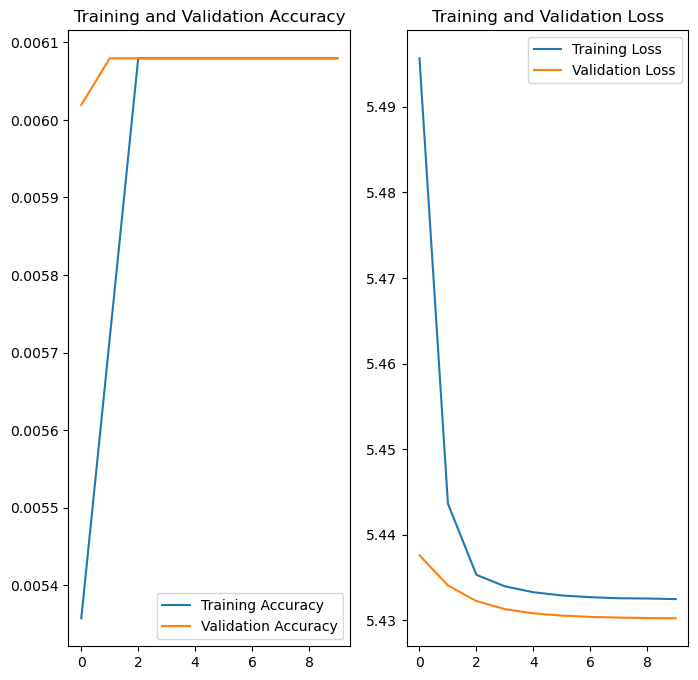

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_path = pathlib.Path('snk1.jpg')

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 269ms/step
This image most likely belongs to Death Note with a 0.60 percent confidence.
